In [ ]:
# All the Imports Here
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import string
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
st = pd.read_csv('Sentiment.csv')
ce = pd.read_csv('Canadian_elections_2019.csv')

In [ ]:
#I will choose a subset of 2000 examples only.
st = st.iloc[0:2000]

In [ ]:
ce.head()

,sentiment,negative_reason,text
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."


# 1.0 Data Cleaning

### 1.1 Remove the URL
There are some cells include URL, we need to remove them all since they will impact our analysis when we count the term frequency. We need to do this at the very beginning because after applying tokenizer, the URL will be broken into pieces and hard to distinguish. 

In [ ]:
def URLless (text):
  for i in range (len(text)):
    if i%10000 == 0:
      print('processed: ' +str(i))
    if type(text[i])==str:
      text[i] = re.sub(r'http\S+', '',text[i])

In [ ]:
URLless(st.text)

processed: 0


In [ ]:
URLless(ce.text)

processed: 0


### 1.2 Tokenize the Text
First of all, we need to tokenize the text contents. Namely, break each string into a list of substrings. In this case we will use RegexpTokenizer from nltk package, because it removes all the punctuations for us. 

In [ ]:
# The function used to tokenize the texts for each file
def tok (text):
  tokenizer = RegexpTokenizer('\w+')
  for i in range (len(text)):
    if i%10000 == 0: # Check the progress
      print('processed: ' +str(i))
    if type(text[i])==str: # If some cells are empty, we left them as that. Only process non empty cells
      text[i] = tokenizer.tokenize(text[i])

In [ ]:
tok(st.text)

processed: 0


In [ ]:
tok(ce.text)

processed: 0


In [ ]:
st.head() #Check tokenization 

,sentiment,text
0,Positive,"[RT, Diplomtc_Immnty, realDonaldTrump, They, t..."
1,Negative,"[chiefy74, Damn, i, m, jealous, i, wanna, watc..."
2,Positive,"[I, m, listening, The, Beatles, now, They, re,..."
3,Positive,"[ddlovato, could, i, please, get, a, shout, ou..."
4,Positive,"[salspizza, just, spotted, ur, message, there,..."


In [ ]:
ce.head()

,sentiment,negative_reason,text
0,Negative,Women Reproductive right and Racism,"[b, RosieBarton, So, instead, of, your, sugges..."
1,Positive,NaN,"[b, AllWomanSpacewalk, it, s, real, n, Space_S..."
2,Negative,Economy,"[b, Brantford, It, s, going, to, cost, YOU, 94..."
3,Positive,NaN,"[b, Canada, CanadaElection2019, CanadaVotes, n..."
4,Negative,Economy,"[b, Canada, taxpayers, are, sick, amp, tired, ..."


### 1.3 Lowercase all the Strings
Next, we need to make everything in lowercase so that they are comparable. I.e. "So" and "so" should be same terms. If we don't do lowercase, they will be considered different terms. 

In [ ]:
def lower (text):
  for i in range (len(text)):
    # if i%10000 == 0: # Check the progress
    #   print('processed: ' +str(i))
    if type(text[i])==list: # Do only non empty cells
      text[i] = [token.lower() for token in text[i]]

In [ ]:
lower(st.text)

In [ ]:
lower(ce.text)

In [ ]:
st.head() # Check lowercase

,sentiment,text
0,Positive,"[rt, diplomtc_immnty, realdonaldtrump, they, t..."
1,Negative,"[chiefy74, damn, i, m, jealous, i, wanna, watc..."
2,Positive,"[i, m, listening, the, beatles, now, they, re,..."
3,Positive,"[ddlovato, could, i, please, get, a, shout, ou..."
4,Positive,"[salspizza, just, spotted, ur, message, there,..."


In [ ]:
ce.head()

,sentiment,negative_reason,text
0,Negative,Women Reproductive right and Racism,"[b, rosiebarton, so, instead, of, your, sugges..."
1,Positive,NaN,"[b, allwomanspacewalk, it, s, real, n, space_s..."
2,Negative,Economy,"[b, brantford, it, s, going, to, cost, you, 94..."
3,Positive,NaN,"[b, canada, canadaelection2019, canadavotes, n..."
4,Negative,Economy,"[b, canada, taxpayers, are, sick, amp, tired, ..."


### 1.4 Remove the Stop Words
Now we need to remove all the stop words such as "all", "is", "the" and etc. These words are not informative for analysis. The nltk package provides us a list of stop words. We remove all the words within that list. Also, we observe there are some singl-letter string within the list such as "b" or "n". We also want to remove them.  

In [ ]:
def stop (text):
  stop_words = set(stopwords.words('english')) 
  alphabet_string = string.ascii_lowercase
  alphabet_list = list(alphabet_string)
  for i in range (len(text)):
    # if i%10000 == 0: # Check the progress
    #   print('processed: ' +str(i))
    if type(text[i])==list:
      text[i] = [w for w in text[i] if not (w in stop_words)|(w in alphabet_list)]

In [ ]:
stop(st.text)

In [ ]:
stop(ce.text)

In [ ]:
st.head() #Check stop words removing

,sentiment,text
0,Positive,"[rt, diplomtc_immnty, realdonaldtrump, tried, ..."
1,Negative,"[chiefy74, damn, jealous, wanna, watch, fight,..."
2,Positive,"[listening, beatles, great]"
3,Positive,"[ddlovato, could, please, get, shout, anything..."
4,Positive,"[salspizza, spotted, ur, message, tony, replied]"


In [ ]:
ce.head()

,sentiment,negative_reason,text
0,Negative,Women Reproductive right and Racism,"[rosiebarton, instead, suggestion, agree, cana..."
1,Positive,NaN,"[allwomanspacewalk, real, space_station, etobi..."
2,Negative,Economy,"[brantford, going, cost, 94, billion, next, 4,..."
3,Positive,NaN,"[canada, canadaelection2019, canadavotes, elxn..."
4,Negative,Economy,"[canada, taxpayers, sick, amp, tired, hard, ea..."


### 1.5 Stem the words
Lastly we need to stem the words. For example, "going" and "go" should be considered same terms. We will use Porter Stemmer to make the terms in standard form. Although some words look wired after stemming, their identical words will still be identical to them because everything is getting stemmed. However, we will not stem the words before applying machine learning algorithm because words will become wierd after stemming and not able to conduct exploratory analysis. 

In [ ]:
def stem (text):
   ps = PorterStemmer()
   for i in range (len(text)):
    #  if i%10000 == 0:
    #    print('processed: ' +str(i))
     if type(text[i])==list:
       text[i] = [ps.stem(token) for token in text[i]]

# 2.0 Exploratory Analysis

### 2.1 Gather Key words for Identifying Political Parties
To determine the political party of a given tweete, the intuitive way is to look for the key words which can be linked to a particular party. For example, Trudeau - Liberal Party. 

In [ ]:
Liberal_list = ['trudeau','liberal','freeland','chretien','change','lpc']
NDP_list = ['singh','ndp','orange','mulcair','quebec','blanchet','francois']
Conser_list = ['scheer','conserv','cpc','poilievre','harper','blue']

In [ ]:
party = []
for i in range (len(ce.text)):
  L = 0
  N = 0
  C = 0
# Count the key words in each tweets
  for word in ce.text[i]:
    for term in Liberal_list:
      if term in word:
        L += 1
    for term in NDP_list:
      if term in word:
        N += 1
    for term in Conser_list:
      if term in word:
        C += 1
# Compare the number of key words, if equal we classify it as none
  if L>N and L>C:
    party.append('Liberal')
  elif N>L and N>C:
    party.append('NDP')
  elif C>L and C>N:
    party.append('Conservative')
  else:
    party.append('none')

In [ ]:
# Number of None
party.count('none')

1038

In [ ]:
# Number of Liberal Party
party.count('Liberal')

375

In [ ]:
# Number of NDP
party.count('NDP')

185

In [ ]:
# Number of Conservative
party.count('Conservative')

535

In [ ]:
# Total Number of Tweets
len(party)

2133

###  Results
Nearly half of the people don't have a clear stand on political affiliation. For those who have, most people are talking about Conservative Party and least people are talking about NDP. This makes sense because NDP is a minor party in Canada. However, we don't know if they are talking good things or bad things about the party and we are going to investigate this later. 

### 2.2 Visualize Some Aspects of Sentiment

In [ ]:
pos = list(st.sentiment).count('Positive')
neg = list(st.sentiment).count('Negative')

In [ ]:
# Number of Positive
pos

871

In [ ]:
# Number of Negative
neg

1082

In [ ]:
# The function used to get the length of each tweets (after cleaning)
def length (list_):
  len_ = []
  for i in range (len(list_)):
    if type(list_[i]) == list:
      len_.append(len(list_[i]))
  return len_

In [ ]:
# Count the length for positive and negative tweets for sentiment and Canadian elections respectively
pos_len_st = length(list(st.loc[st.sentiment=='Positive'].text))
neg_len_st = length(list(st.loc[st.sentiment=='Negative'].text))
pos_len_ce = length(list(ce.loc[ce.sentiment=='Positive'].text))
neg_len_ce = length(list(ce.loc[ce.sentiment=='Negative'].text))

[Text(0, 0.5, 'Tweets Length (After Cleaning)'),
 Text(0.5, 0, 'Negative'),
 Text(0.5, 1.0, 'Boxplot of Negative Tweets Length')]

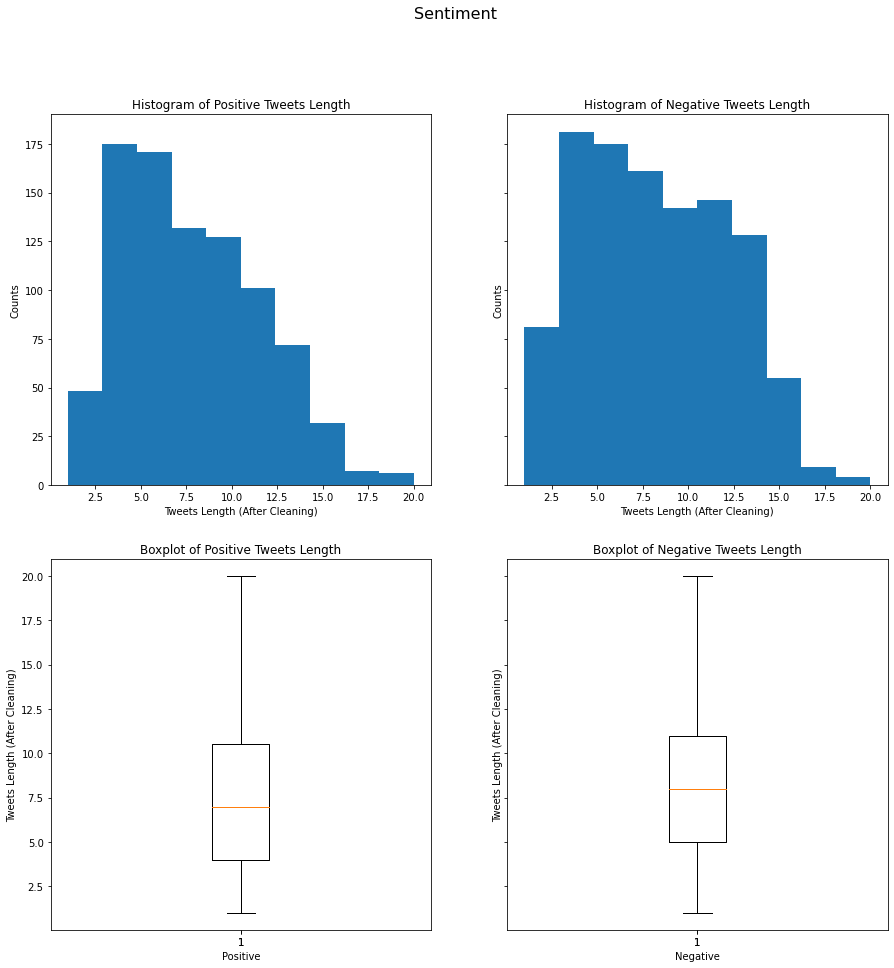

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,15),sharex='row',sharey='row')
fig.suptitle('Sentiment', fontsize=16)
ax[0, 0].hist(pos_len_st)
ax[0, 0].set(xlabel='Tweets Length (After Cleaning)',ylabel='Counts',title='Histogram of Positive Tweets Length')
ax[0, 1].hist(neg_len_st)
ax[0, 1].set(xlabel='Tweets Length (After Cleaning)',ylabel='Counts',title='Histogram of Negative Tweets Length')
ax[1, 0].boxplot(pos_len_st)
ax[1, 0].set(xlabel='Positive',ylabel='Tweets Length (After Cleaning)',title='Boxplot of Positive Tweets Length')
ax[1, 1].boxplot(neg_len_st)
ax[1, 1].set(xlabel='Negative',ylabel='Tweets Length (After Cleaning)',title='Boxplot of Negative Tweets Length')

[Text(0, 0.5, 'Tweets Length (After Cleaning)'),
 Text(0.5, 0, 'Negative'),
 Text(0.5, 1.0, 'Boxplot of Negative Tweets Length')]

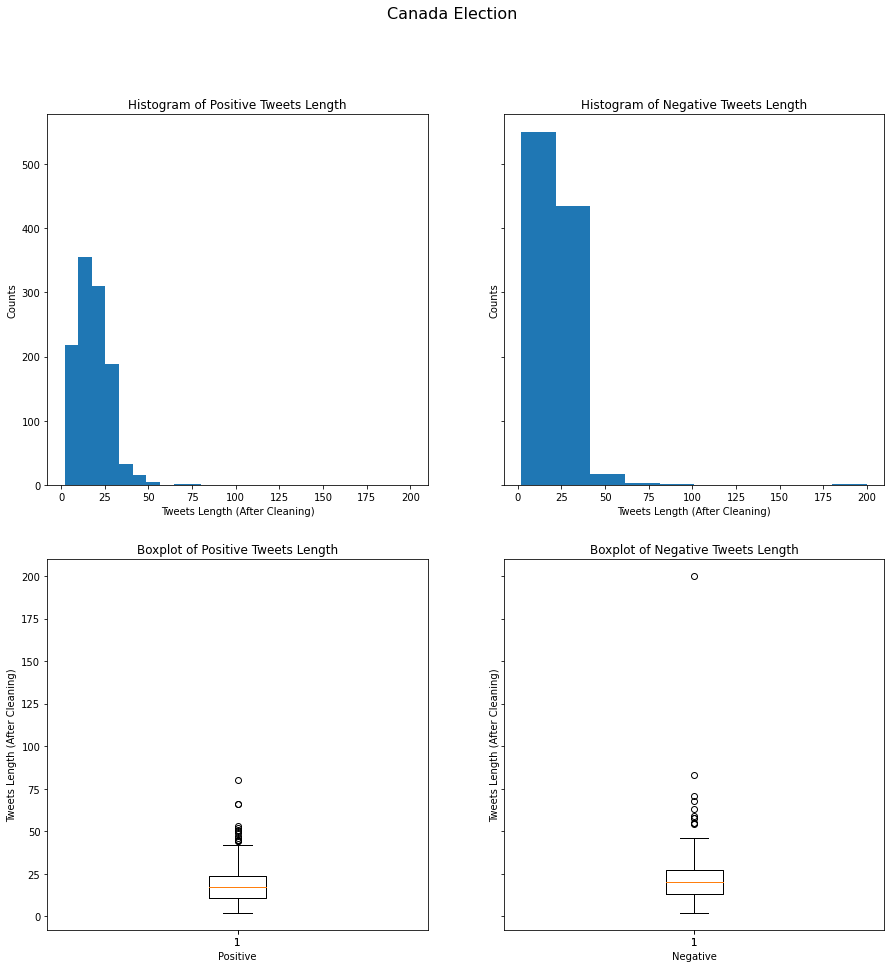

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,15),sharex='row',sharey='row')
fig.suptitle('Canada Election', fontsize=16)
ax[0, 0].hist(pos_len_ce)
ax[0, 0].set(xlabel='Tweets Length (After Cleaning)',ylabel='Counts',title='Histogram of Positive Tweets Length')
ax[0, 1].hist(neg_len_ce)
ax[0, 1].set(xlabel='Tweets Length (After Cleaning)',ylabel='Counts',title='Histogram of Negative Tweets Length')
ax[1, 0].boxplot(pos_len_ce)
ax[1, 0].set(xlabel='Positive',ylabel='Tweets Length (After Cleaning)',title='Boxplot of Positive Tweets Length')
ax[1, 1].boxplot(neg_len_ce)
ax[1, 1].set(xlabel='Negative',ylabel='Tweets Length (After Cleaning)',title='Boxplot of Negative Tweets Length')

### 2.3 Comment on the Result
From the above figure, we can observe that negative tweets are slightly longer than positive tweets (after text cleaning). This indicates when people are complaining, they need more words. 

# 3.0 Model Preperation

In [ ]:
# First, stem the texts
stem(st.text)

In [ ]:
st_text = list(st.text)

In [ ]:
# Convert the lists in to string for vectorization
for i in range (len(st_text)):
  if type(st_text[i]) == list:
    st_text[i] = ' '.join(st_text[i])

In [ ]:
# Check if there's empty entries
for i in range (len(st_text)):
  if st_text[i] == '':
    print('empty')

In [ ]:
# Vectorize the text in terms of word frequency
vectorizer = CountVectorizer()
array_WF = vectorizer.fit_transform(st_text).toarray()
#print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names())
print(array_WF)

['000', '03', '07', '08', '09', '10', '100', '103', '109', '10hr', '11', '11pm', '12', '14', '140', '14k', '15', '151', '16', '17', '18', '18k', '19', '1955', '1984', '1a', '1st', '20', '200', '20036', '2008', '2009', '2011', '2016', '21', '212', '21st', '22', '24', '25', '256kbp', '26', '27', '2am', '2day', '2do', '2moz', '2nd', '2nite', '30', '30am', '31', '33', '34', '39', '3am', '3g', '3pm', '3rd', '3wk', '40', '400', '40k', '40min', '41', '420', '430am', '4861', '490', '4am', '4billlewi', '4n', '4pm', '4skinmus', '4th', '514', '5am', '5th', '60', '60ish', '6am', '6hour', '6hr', '6pm', '70', '7am', '7mood', '7sick', '80', '800', '89c4', '8km', '90', '900', '9401', '9th', '_darling_nikki', '_ena_', '_niki_stardust_', 'a200', 'aaa', 'aaaand', 'aaaargh', 'aarrrggghhh', 'abandon', 'abc', 'aberdeen', 'abl', 'abort', 'abscess', 'absolut', 'absolutli', 'absorb', 'abt', 'acc', 'acc_shan', 'accchhh', 'accept', 'accesorri', 'access', 'account', 'acct', 'accur', 'ace', 'ach', 'achi', 'achiev'

In [ ]:
# Vectorize the text in terms of TF-IDF
vectorizer3 = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None)
array_TFIDF = vectorizer3.fit_transform(st_text).toarray()
print( vectorizer3.get_feature_names() )
print( array_TFIDF )

['000', '03', '07', '08', '09', '10', '100', '103', '109', '10hr', '11', '11pm', '12', '14', '140', '14k', '15', '151', '16', '17', '18', '18k', '19', '1955', '1984', '1a', '1st', '20', '200', '20036', '2008', '2009', '2011', '2016', '21', '212', '21st', '22', '24', '25', '256kbp', '26', '27', '2am', '2day', '2do', '2moz', '2nd', '2nite', '30', '30am', '31', '33', '34', '39', '3am', '3g', '3pm', '3rd', '3wk', '40', '400', '40k', '40min', '41', '420', '430am', '4861', '490', '4am', '4billlewi', '4n', '4pm', '4skinmus', '4th', '514', '5am', '5th', '60', '60ish', '6am', '6hour', '6hr', '6pm', '70', '7am', '7mood', '7sick', '80', '800', '89c4', '8km', '90', '900', '9401', '9th', '_darling_nikki', '_ena_', '_niki_stardust_', 'a200', 'aaa', 'aaaand', 'aaaargh', 'aarrrggghhh', 'abandon', 'abc', 'aberdeen', 'abl', 'abort', 'abscess', 'absolut', 'absolutli', 'absorb', 'abt', 'acc', 'acc_shan', 'accchhh', 'accept', 'accesorri', 'access', 'account', 'acct', 'accur', 'ace', 'ach', 'achi', 'achiev'

In [ ]:
# Encoding the sentiment, 1 for positive and 0 for negative
label = list(st.sentiment)
for i in range (len(label)):
  if label[i] == 'Positive':
    label[i] = 1
  else:
    label[i] = 0
label = np.array(label)

In [ ]:
# Split the train and test sets
X_train_WF, X_test_WF, y_train_WF, y_test_WF = train_test_split(array_WF, label, test_size=0.3, random_state=42)
X_train_TFidf, X_test_TFidf, y_train_TFidf, y_test_TFidf = train_test_split(array_TFIDF, label, test_size=0.3, random_state=42)

# 4.0 Model Implementation
In this part we are going to train several models on both WF and TD-IDF scoring method. Each model is tuned by grid search in cross validation. We figure out Logistic Regression model with WF scoring gives the best accuracy (69.5%). 

### 4.1 Logistic Regression

##### 4.1.1 Logistic Regression for WF

In [ ]:
clf = LogisticRegression(max_iter=10000)

In [ ]:
C = [0.001,0.01,0.05,0.1,0.5,1,5,10]
param_grid = dict(C=C)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train_WF,y_train_WF)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

Best Score:  0.6907142857142857
Best Parameters:  {'C': 1}


In [ ]:
clf = LogisticRegression(max_iter=10000,C=0.5).fit(X_train_WF,y_train_WF)
print('Logistic Regression model accuracy with optimal hyperparameters is: {}%'.format(round(clf.score(X_test_WF,y_test_WF)*100,3)))

Logistic Regression model accuracy with optimal hyperparameters is: 69.5%


##### 4.1.2 Logistic Regression for TF-IDF

In [ ]:
C = [0.001,0.01,0.05,0.1,0.5,1,5,10]
param_grid = dict(C=C)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train_TFidf,y_train_TFidf)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

Best Score:  0.6885714285714286
Best Parameters:  {'C': 0.05}


In [ ]:
clf = LogisticRegression(max_iter=10000,C=0.5).fit(X_train_TFidf,y_train_TFidf)
print('Logistic Regression model accuracy with optimal hyperparameters is: {}%'.format(round(clf.score(X_test_TFidf,y_test_TFidf)*100,3)))

Logistic Regression model accuracy with optimal hyperparameters is: 69.0%


### 4.2 KNN

##### 4.2.1 KNN for WF

In [ ]:
neigh = KNeighborsClassifier()

In [ ]:
n = [5,6,7,8,9,10]
param_grid = dict(n_neighbors=n)
grid = GridSearchCV(estimator=neigh, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train_WF,y_train_WF)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

Best Score:  0.6
Best Parameters:  {'n_neighbors': 5}


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5).fit(X_train_WF,y_train_WF)
print('KNN model accuracy with optimal hyperparameters is: {}%'.format(round(neigh.score(X_test_WF,y_test_WF)*100,3)))

KNN model accuracy with optimal hyperparameters is: 63.0%


##### 4.2.2 KNN for TF-IDF

In [ ]:
n = [5,6,7,8,9,10]
param_grid = dict(n_neighbors=n)
grid = GridSearchCV(estimator=neigh, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train_TFidf,y_train_TFidf)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

Best Score:  0.5778571428571428
Best Parameters:  {'n_neighbors': 5}


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5).fit(X_train_TFidf,y_train_TFidf)
print('KNN model accuracy with optimal hyperparameters is: {}%'.format(round(neigh.score(X_test_TFidf,y_test_TFidf)*100,3)))

KNN model accuracy with optimal hyperparameters is: 59.333%


### 4.3 Naive Bayes

##### 4.3.1 NB for WF

In [ ]:
NB = MultinomialNB()

In [ ]:
alpha = [0.1,1,10,20,30,50]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=NB, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train_WF,y_train_WF)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

Best Score:  0.6992857142857144
Best Parameters:  {'alpha': 1}


In [ ]:
NB = MultinomialNB(alpha=1).fit(X_train_WF,y_train_WF)
print('Naive Bayes model accuracy with optimal hyperparameters is: {}%'.format(round(NB.score(X_test_WF,y_test_WF)*100,3)))

Naive Bayes model accuracy with optimal hyperparameters is: 71.167%


##### 4.3.2 NB for TF-IDF

In [ ]:
alpha = [0.1,1,10,20,30,50]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=NB, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train_TFidf,y_train_TFidf)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

Best Score:  0.6971428571428573
Best Parameters:  {'alpha': 20}


In [ ]:
NB = MultinomialNB(alpha=1).fit(X_train_TFidf,y_train_TFidf)
print('Naive Bayes model accuracy with optimal hyperparameters is: {}%'.format(round(NB.score(X_test_TFidf,y_test_TFidf)*100,3)))

Naive Bayes model accuracy with optimal hyperparameters is: 66.0%


### 4.4 SVM

##### 4.4.1 SVM for WF

In [ ]:
svm = SVC()

In [ ]:
C = [0.001,0.01,0.05,0.1,0.5,1,5,10]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=C, kernel=kernel)
grid = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train_WF,y_train_WF)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

KeyboardInterrupt: ignored

In [ ]:
svm = SVC(C=0.5,kernel='linear').fit(X_train_WF,y_train_WF)
print('SVM model accuracy with optimal hyperparameters is: {}%'.format(round(svm.score(X_test_WF,y_test_WF)*100,3)))

##### 4.4.2 SVM for TF-IDF

In [ ]:
C = [0.001,0.01,0.05,0.1,0.5,1,5,10]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=C, kernel=kernel)
grid = GridSearchCV(estimator=svm, param_grid=param_grid,scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train_TFidf,y_train_TFidf)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

In [ ]:
svm = SVC(C=0.5,kernel='linear').fit(X_train_TFidf,y_train_TFidf)
print('SVM model accuracy with optimal hyperparameters is: {}%'.format(round(svm.score(X_test_TFidf,y_test_TFidf)*100,3)))

### 4.5 Decision Tree

##### 4.5.1 Decision Tree for WF

In [ ]:
Tree = DecisionTreeClassifier()

In [ ]:
criterion = ['gini','entropy']
max_depth = [25,50,100,200,500,700,1000]
param_grid = dict(criterion=criterion, max_depth=max_depth)
grid = GridSearchCV(estimator=Tree, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train_WF,y_train_WF)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

In [ ]:
Tree = DecisionTreeClassifier(criterion='entropy',max_depth=1000).fit(X_train_WF,y_train_WF)
print('Decision Tree model accuracy with optimal hyperparameters is: {}%'.format(round(Tree.score(X_test_WF,y_test_WF)*100,3)))

##### 4.5.2 Decision Tree for TF-IDF

In [ ]:
criterion = ['gini','entropy']
max_depth = [25,50,100,200,500,700,1000]
param_grid = dict(criterion=criterion, max_depth=max_depth)
grid = GridSearchCV(estimator=Tree, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train_TFidf,y_train_TFidf)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

In [ ]:
Tree = DecisionTreeClassifier(criterion='entropy',max_depth=1000).fit(X_train_TFidf,y_train_TFidf)
print('Decision Tree model accuracy with optimal hyperparameters is: {}%'.format(round(Tree.score(X_test_TFidf,y_test_TFidf)*100,3)))

### 4.6 Random Forest

##### 4.6.1 Random Forest for WF

In [ ]:
Forest = RandomForestClassifier()

In [ ]:
n_estimators = [10,50,100,200]
max_depth = [50,100,200,500,1000]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=Forest, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train_WF,y_train_WF)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

In [ ]:
Forest = RandomForestClassifier(max_depth=500,n_estimators=50).fit(X_train_WF,y_train_WF)
print('Random Forest model accuracy with optimal hyperparameters is: {}%'.format(round(Forest.score(X_test_WF,y_test_WF)*100,3)))

##### 4.6.2 Random Forest for TF-IDF

In [ ]:
n_estimators = [10,50,100,200]
max_depth = [50,100,200,500,1000]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=Forest,  param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train_TFidf,y_train_TFidf)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

In [ ]:
Forest = RandomForestClassifier(max_depth=500,n_estimators=50).fit(X_train_TFidf,y_train_TFidf)
print('Random Forest model accuracy with optimal hyperparameters is: {}%'.format(round(Forest.score(X_test_TFidf,y_test_TFidf)*100,3)))

### 4.7 Applying Best Model on Canadian Election
The best model is Logistic Regression with WF scoring, C = 0.5

In [ ]:
# Stem the Canadian Election text, and follow the same method for vectorizing as before
stem(ce.text)

In [ ]:
ce_text = list(ce.text)

In [ ]:
for i in range (len(ce_text)):
  if type(ce_text[i]) == list:
    ce_text[i] = ' '.join(ce_text[i])

In [ ]:
vectorizer = CountVectorizer()
array_ce_WF = vectorizer.fit_transform(ce_text).toarray()
#print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names())
print(array_ce_WF)

In [ ]:
label = list(ce.sentiment)
for i in range (len(label)):
  if label[i] == 'Positive':
    label[i] = 1
  else:
    label[i] = 0
label = np.array(label)

In [ ]:
# Split the train and test sets
X_train_WF, X_test_WF, y_train_WF, y_test_WF = train_test_split(array_ce_WF, label, test_size=0.3, random_state=42)

In [ ]:
# Predict the sentiment using the LR model
clf2 = LogisticRegression(max_iter=10000,C=0.5).fit(X_train_WF,y_train_WF)
print('Logistic Regression model accuracy on Canadian election is: {}%'.format(round(clf2.score(X_test_WF,y_test_WF)*100,3)))

In [ ]:
pred = clf2.predict(X_test_WF)

### Comment on the Result
If we use the model on 2019 Canadian Election, it's can obtain a similar result (65.531%) comparing to sentiment. This implies logistic regression works well on sentiment alanysis universally. 

### 4.8 Predict the Sentiment on each Party

In [ ]:
# Add a column 'party' to the dataframe
ce['party'] = party

In [ ]:
# Encoding the sentiment
for i in range (len(ce.sentiment)):
  if ce.sentiment[i] == 'Positive':
    ce.sentiment[i] = 1
  else:
    ce.sentiment[i] = 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ce, label, test_size=0.3, random_state=42)

In [ ]:
X_test['predicted_sentiment'] = pred

In [ ]:
lp = X_test.loc[X_test.party=='Liberal']
lp_pos = len(lp.loc[lp.sentiment==1])
lp_neg = len(lp.loc[lp.sentiment==0])

In [ ]:
labels = ['Positive', 'Negative']
sizes = [lp_pos/len(lp)*100,lp_neg/len(lp)*100]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.title('Liberal Party Sentiment Percentage (Real)')

plt.show()

In [ ]:
plt.hist(lp.sentiment)
plt.xlabel('1 for positive, 0 for negative')
plt.ylabel('Counts')
plt.title('Liberal Party Sentiment Counts (Real)')

In [ ]:
lp = X_test.loc[X_test.party=='Liberal']
lp_pos = len(lp.loc[lp.predicted_sentiment==1])
lp_neg = len(lp.loc[lp.predicted_sentiment==0])

In [ ]:
labels = ['Positive', 'Negative']
sizes = [lp_pos/len(lp)*100,lp_neg/len(lp)*100]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.title('Liberal Party Sentiment Percentage (Predicted)')

plt.show()

In [ ]:
plt.hist(lp.sentiment)
plt.xlabel('1 for positive, 0 for negative')
plt.ylabel('Counts')
plt.title('Liberal Party Sentiment Counts (Predicted)')

In [ ]:
cpc = X_test.loc[X_test.party=='Conservative']
cpc_pos = len(cpc.loc[cpc.sentiment==1])
cpc_neg = len(cpc.loc[cpc.sentiment==0])

In [ ]:
labels = ['Positive', 'Negative']
sizes = [cpc_pos/len(cpc)*100,cpc_neg/len(cpc)*100]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.title('Convervative Party Sentiment Percentage (Real)')

plt.show()

In [ ]:
plt.hist(cpc.sentiment)
plt.xlabel('1 for positive, 0 for negative')
plt.ylabel('Counts')
plt.title('Conservative Party Sentiment Counts (Real)')

In [ ]:
cpc = X_test.loc[X_test.party=='Conservative']
cpc_pos = len(cpc.loc[cpc.predicted_sentiment==1])
cpc_neg = len(cpc.loc[cpc.predicted_sentiment==0])

In [ ]:
labels = ['Positive', 'Negative']
sizes = [cpc_pos/len(cpc)*100,cpc_neg/len(cpc)*100]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.title('Convervative Party Sentiment Percentage (Predicted)')

plt.show()

In [ ]:
plt.hist(cpc.sentiment)
plt.xlabel('1 for positive, 0 for negative')
plt.ylabel('Counts')
plt.title('Conservative Party Sentiment Counts (Predicted)')

In [ ]:
NDP = X_test.loc[X_test.party=='NDP']
NDP_pos = len(NDP.loc[NDP.sentiment==1])
NDP_neg = len(NDP.loc[NDP.sentiment==0])

In [ ]:
labels = ['Positive', 'Negative']
sizes = [NDP_pos/len(NDP)*100,NDP_neg/len(NDP)*100]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.title('NDP Sentiment Percentage')

plt.show()

In [ ]:
plt.hist(NDP.sentiment)
plt.xlabel('1 for positive, 0 for negative')
plt.ylabel('Counts')
plt.title('NDP Sentiment Counts')

In [ ]:
NDP = X_test.loc[X_test.party=='NDP']
NDP_pos = len(NDP.loc[NDP.predicted_sentiment==1])
NDP_neg = len(NDP.loc[NDP.predicted_sentiment==0])

In [ ]:
labels = ['Positive', 'Negative']
sizes = [NDP_pos/len(NDP)*100,NDP_neg/len(NDP)*100]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.title('NDP Sentiment Percentage (Predicted)')

plt.show()

In [ ]:
plt.hist(NDP.sentiment)
plt.xlabel('1 for positive, 0 for negative')
plt.ylabel('Counts')
plt.title('NDP Sentiment Counts (Predicted)')

### Comment on the Result
The Liberal party won in 2019. It has nearly 50% positive rate which is much higher comparing to CPC (29.7%). Although NDP has a very high positive rate (66.5%), it's positive counts is much less than Liberal. As a result, Liberal Party won the election. If we compare the predicted figures vs real figures, we can see they are quite similar. Regardless of accuracy, the predicted total number of positive and negative are close enough to reality. Therefore NLP analysis based on tweets is very useful for political parties. 

### 4.9 Predict Negative Reason
Combine Women Reprodictive right and Racism AND Separation, Scandal AND Tell lies, Healthcare AND Healthcare and Marijuana. Theese group are talking about similar things. 

In [ ]:
ng = ce.loc[ce.sentiment==0]

In [ ]:
ng.negative_reason.unique()

In [ ]:
ng.index

In [ ]:
for i in ng.index:
  if ng.negative_reason[i] == 'Women Reproductive right and Racism' or ng.negative_reason[i] == 'Separation':
    ng.negative_reason[i] = 0
  elif ng.negative_reason[i] == 'Scandal' or ng.negative_reason[i] == 'Tell lies':
    ng.negative_reason[i] = 1
  elif ng.negative_reason[i] == 'Healthcare' or ng.negative_reason[i] == 'Healthcare and Marijuana':
    ng.negative_reason[i] = 2
  elif ng.negative_reason[i] == 'Economy':
    ng.negative_reason[i] = 3
  elif ng.negative_reason[i] == 'Privilege':
    ng.negative_reason[i] = 4
  elif ng.negative_reason[i] == 'Climate Problem':
    ng.negative_reason[i] = 5
  elif ng.negative_reason[i] == 'Others':
    ng.negative_reason[i] = 6

In [ ]:
ng_text = list(ng.text)

In [ ]:
for i in range (len(ng_text)):
  if type(ng_text[i]) == list:
    ng_text[i] = ' '.join(ng_text[i])

In [ ]:
vectorizer = CountVectorizer()
array_ng_WF = vectorizer.fit_transform(ng_text).toarray()
#print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names())
print(array_ng_WF)

In [ ]:
reason = list(ng.negative_reason)

In [ ]:
X_train_WF, X_test_WF, y_train_WF, y_test_WF = train_test_split(array_ng_WF, reason, test_size=0.3, random_state=42)

In [ ]:
mlr = LogisticRegression(max_iter=10000).fit(X_train_WF,y_train_WF)

In [ ]:
# Result of Logistic Regression on predicting reasons
pred_mlr = mlr.predict(X_test_WF)
accuracy_score(y_test_WF,pred_mlr)

In [ ]:
knn = KNeighborsClassifier().fit(X_train_WF,y_train_WF)

In [ ]:
# Result of KNN on predicting reasons
pred_knn = knn.predict(X_test_WF)
accuracy_score(pred_knn,y_test_WF)

In [ ]:
svm = SVC().fit(X_train_WF,y_train_WF)

In [ ]:
# Result of SVM on predicting reasons
pred_svm = svm.predict(X_test_WF)
accuracy_score(pred_svm,y_test_WF)

# 5.0 Discussion
The first model has an accuracy of 65.3% on predicting sentiment. However, when we use sentiment analysis on political election, we care more on the total number of positive/negative rather than predicting every example correctly. The Liberal party won in 2019. It has nearly 50% positive rate which is much higher comparing to CPC (29.7%). Although NDP has a very high positive rate (66.5%), it's positive counts is much less than Liberal. As a result, Liberal Party won the election. If we compare the predicted figures vs real figures, we can see they are quite similar. Regardless of accuracy, the predicted total number of positive and negative are close enough to reality. Therefore NLP analysis based on tweets is very useful for political parties. 
The best algorithm for second model is also Logistic Regression (accuracy = 60.9%). The accuracy is lower than sentiment analysis due to the fact of multiclass prediction. Reason prediction has 7 different labels while sentiment only has 2. The below are examples of negative reasons: there are identical terms in the text but they are labeled as different reasons. This may account for the failure to predict negative reasons. 
To improve the accuracy of both model, we should firstly increase the data size. Due to the limitation of computing power, we used only 2000 examples to train the model， which is not enough. In terms of algorithm, we could tokenize the text phrase-wisely instead of word-wisely (what we did here). For example, if a phrase like 'not good' appears in the text which are obviously negative sign. If we do word-wise tokenization it will become 'not', 'good' and 'not' will be deleted by stop words. As a result, the text with 'good' has a negative label and this is not what we want. If we condider phrase-wise tokenization, 'not good' will be accurately assigned to negative sentiment. The appropriate combination of word-wise and phrase-wise tokenization will help to improve the accuracy of both models. 

In [ ]:
print(list(X_test.loc[X_test.sentiment==0].text)[3])
print(list(X_test.loc[X_test.sentiment==0].negative_reason)[3])

In [ ]:
print(list(X_test.loc[X_test.sentiment==0].text)[40])
print(list(X_test.loc[X_test.sentiment==0].negative_reason)[40])